In [1]:
import pandas as pd # good for reading data and manipulating tables of data 
import matplotlib.pyplot as plt # the general plotting library
import numpy as np # for general math stuff
import matplotlib.patches as mpatches
from itertools import cycle, islice

# Import Data

### Docs data

In [2]:
# import fragebogen
path = "../data/Fragebogen.xlsx"

text_data = pd.read_excel(path)
text_data

ID  aufgabe condition  F1  F2  F3  F4  F5  F6  F7  ...  chars  \
0   TA09BE        1         A   3   6   2  11   4   5  12  ...    839   
1   TA09BE        2         B   9   8  13   9  14   3   7  ...    877   
2   TA09BE        3         D  11   5  15   7   9   6   4  ...    918   
3   TA09BE        4         C   7   3   4   6   5   1  12  ...    577   
4   LU07NI        1         B   3   3  10  12   9   3  12  ...   1896   
..     ...      ...       ...  ..  ..  ..  ..  ..  ..  ..  ...    ...   
59  GA06MA        4         A   4   4   1  14  13   5  15  ...   1357   
60  DI09XA        1         D  12   3   1  12  12   3   6  ...   1144   
61  DI09XA        2         A   6   3   1  15  12   1  15  ...   1362   
62  DI09XA        3         C  12   3   1   8  10   3  15  ...   1488   
63  DI09XA        4         B  10   3  14   7  12   1   4  ...   1238   

                 start                stop typos  grammar  gender watcher  \
0  2022-06-13 12:07:35 2022-06-13 12:17:25     1        0       m      Ja   
1  2022-06-13 12:19:46 2022-06-13 12:28:57     1        1       m      Ja   
2  2022-06-13 12:32:18 2022-06-13 12:40:37     2        1       m      Ja   
3  2022-06-13 12:42:05 2022-06-13 12:48:54     0        0       m      Ja   
4  2022-06-16 12:03:04 2022-06-16 12:13:04     0        0       m      Ja   
..                 ...                 ...   ...      ...     ...     ...   
59 2022-07-01 13:28:04 2022-07-01 13:33:46     1        1       w      Ja   
60                 NaT                 NaT     1        0       w      Ja   
61                 NaT                 NaT     0        0       w      Ja   
62                 NaT                 NaT     0        0       w      Ja   
63                 NaT                 NaT     0        0       w      Ja   

     w1   w2   w3  
0   3.0  3.0  1.0  
1   3.0  3.0  1.0  
2   3.0  3.0  1.0  
3   3.0  3.0  1.0  
4   3.0  4.0  3.0  
..  ...  ...  ...  
59  2.0  3.0  2.0  
60  2.0  4.0  2.0  
61  2.0  4.0  2.0  
62  2.0  4.0  2.0  
63  2.0  4.0  2.0  

[64 rows x 21 columns]

### Survey data

In [3]:
# import survey
path = "../data/survey.xlsx"

surveys = pd.read_excel(path)
surveys

Zeitstempel      id  age  gender                        occup  \
0  2022-06-13 12:55:03.008  TA09BE   23    male                   Student*in   
1  2022-06-16 12:54:06.251  LU07NI   20    male                   Student*in   
2  2022-06-16 13:56:00.935  NA07WA   26    male                   Student*in   
3  2022-06-17 12:59:33.194  DA12JO   20  female                   Student*in   
4  2022-06-17 13:56:02.722  UT03AN   29  female                   Student*in   
5  2022-06-17 15:53:57.534  SI02HA   26  female  Student*in, Arbeitnehmer*in   
6  2022-06-17 16:53:28.806  HI11JO   25    male                   Student*in   
7  2022-06-21 11:55:37.510  CL03RA   24    male                   Student*in   
8  2022-06-21 16:26:12.548  SU05DI   24  female  Student*in, Arbeitnehmer*in   
9  2022-06-28 12:47:27.846  IR04VA   21    male                   Student*in   
10 2022-06-28 15:31:05.186  KE08ST   23    male                   Student*in   
11 2022-06-29 12:30:01.195  CH02OT   23  female                   Student*in   
12 2022-06-29 14:57:05.088  SA06JO   25    male  Student*in, Arbeitnehmer*in   
13 2022-07-01 12:30:01.233  FI10GA   20  female                   Student*in   
14 2022-07-01 13:37:53.700  GA06MA   22  female  Student*in, Arbeitnehmer*in   
15 2022-07-01 16:53:24.316  DI09XA   23  female                   Student*in   

   experience                   usage                        fave  \
0         Yes            Once a month                     3 Nouns   
1         Yes            Once a month                     3 Nouns   
2         Yes   More than once a week                     3 Nouns   
3         Yes             Once a week                     3 Nouns   
4         Yes            Once a month                     3 Nouns   
5         Yes            Once a month  Favorite book/series/movie   
6         Yes            Once a month                   Last trip   
7         Yes   More than once a week                     3 Nouns   
8         Yes             Once a week                     3 Nouns   
9         Yes            Once a month  Favorite book/series/movie   
10        Yes   More than once a week  Favorite book/series/movie   
11        Yes  Less than once a month               Your hometown   
12        Yes             Once a week               Your hometown   
13   Not sure  Less than once a month                     3 Nouns   
14        Yes             Once a week               Your hometown   
15        Yes             Once a week                     3 Nouns   

                          hate                        best  ...  \
0   Favorite book/series/movie                     3 Nouns  ...   
1                    Last trip               Your hometown  ...   
2                Your hometown                     3 Nouns  ...   
3   Favorite book/series/movie               Your hometown  ...   
4   Favorite book/series/movie                     3 Nouns  ...   
5                      3 Nouns  Favorite book/series/movie  ...   
6                      3 Nouns                   Last trip  ...   
7                    Last trip                     3 Nouns  ...   
8   Favorite book/series/movie                     3 Nouns  ...   
9                      3 Nouns  Favorite book/series/movie  ...   
10               Your hometown                   Last trip  ...   
11  Favorite book/series/movie               Your hometown  ...   
12                     3 Nouns                   Last trip  ...   
13                   Last trip                     3 Nouns  ...   
14                     3 Nouns               Your hometown  ...   
15                   Last trip                     3 Nouns  ...   

    [Hast du (allgemein) mehr Spaß, alleine zu arbeiten oder mit Anderen zusammen zu arbeiten?]  \
0                                                   4                                             
1                                                   4                                             
2                                          

# General Stats

Text(0, 0.5, 'occurance')

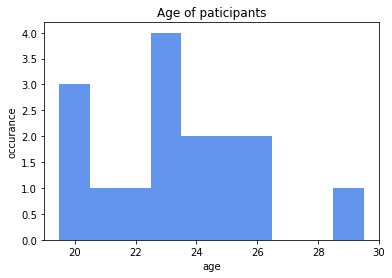

In [4]:
ages = surveys["age"]

plt.hist(ages, bins=np.arange(ages.min(), ages.max()+2)-0.5, color='cornflowerblue')
plt.title("Age of paticipants")
plt.xlabel("age")
plt.ylabel("occurance")

Text(0.5, 1.0, 'What gender do you identify with?')

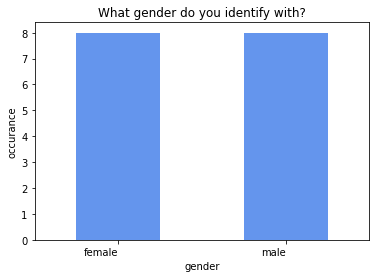

In [5]:
gender = surveys["gender"].value_counts()

gender.plot(kind='bar', color='cornflowerblue')
plt.xticks(rotation=0, ha='right')
plt.xlabel('gender')
plt.ylabel('occurance')
plt.title("What gender do you identify with?")

Text(0.5, 1.0, 'Have you ever used collaborative writing tools?')

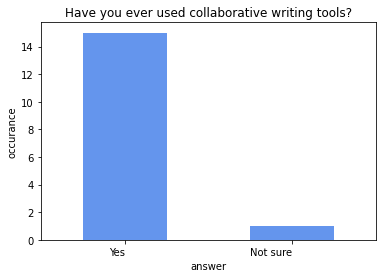

In [14]:
experience = surveys["experience"].value_counts()

experience.plot(kind='bar', color='cornflowerblue')
plt.xticks(rotation=0, ha='right')
plt.xlabel('answer')
plt.ylabel('occurance')
plt.title("Have you ever used collaborative writing tools?")

Text(0.5, 1.0, 'How ofter do you use collaborative writing tools?')

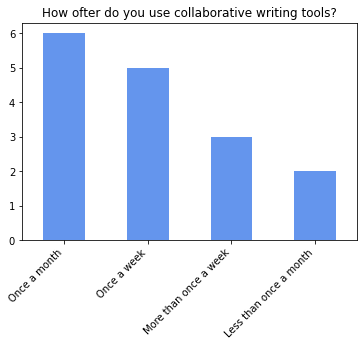

In [15]:
usage = surveys["usage"].value_counts()

usage.plot(kind='bar', color='cornflowerblue')
plt.xticks(rotation=45, ha='right')
plt.title("How ofter do you use collaborative writing tools?")

Text(0.5, 1.0, 'Which task did you like the best?')

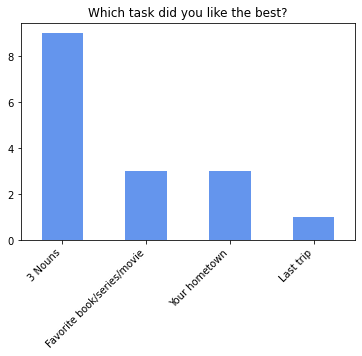

In [8]:
fave = surveys["fave"].value_counts()

fave.plot(kind='bar', color='cornflowerblue')
plt.xticks(rotation=45, ha='right')
plt.title("Which task did you like the best?")

Text(0.5, 1.0, 'Which task did you dislike the most?')

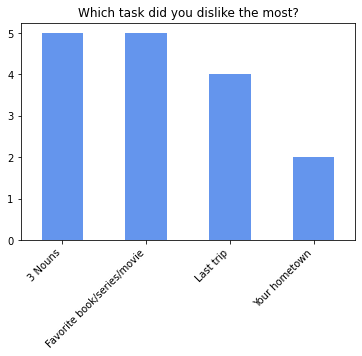

In [9]:
hate = surveys["hate"].value_counts()

hate.plot(kind='bar', color='cornflowerblue')
plt.xticks(rotation=45, ha='right')
plt.title("Which task did you dislike the most?")

Text(0.5, 1.0, 'Which task did you perform the best?')

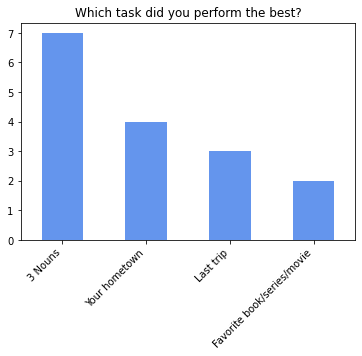

In [16]:
best = surveys["best"].value_counts()

best.plot(kind='bar', color='cornflowerblue')
plt.xticks(rotation=45, ha='right')
plt.title("Which task did you perform the best?")

Text(0.5, 1.0, 'Which task did you perform the worst?')

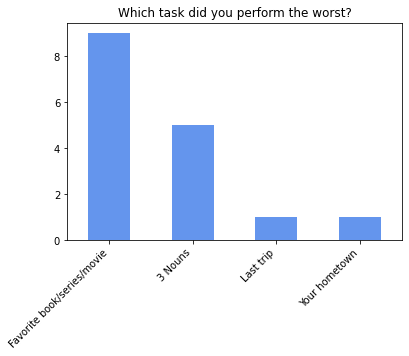

In [17]:
worst = surveys["worst"].value_counts()

worst.plot(kind='bar', color='cornflowerblue')
plt.xticks(rotation=45, ha='right')
plt.title("Which task did you perform the worst?")

# Watcher

Text(0.5, 1.0, 'Did you recognize an observer?')

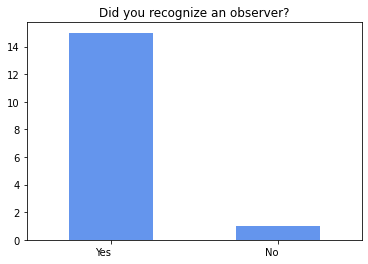

In [151]:
watcher = surveys["watcher"].value_counts()

watcher.plot(kind='bar', color='cornflowerblue')
plt.xticks(rotation=0, ha='right')
plt.title("Did you recognize an observer?")

Text(0.5, 1.0, 'How distracted/focussed were you?')

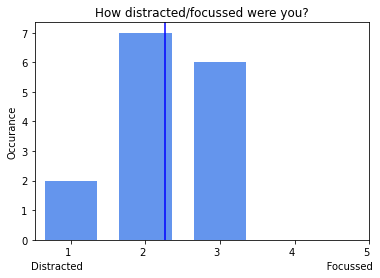

In [147]:
watcherfocus = surveys["w1"]

plt.hist(watcherfocus, bins=np.arange(watcherfocus.min(), watcherfocus.max()+2)-0.5, color='cornflowerblue', rwidth=0.7)
plt.xticks(rotation=0, ha='right')
plt.xticks(np.arange(1,6,1))
plt.yticks(np.arange(0,8,1))
plt.axvline(x = 2.26, color = 'b', linestyle = '-')

plt.xlabel('Distracted                                                                              Focussed')
plt.ylabel('Occurance')
plt.title("How distracted/focussed were you?")

Text(0.5, 1.0, 'How demotivated/motivated were you?')

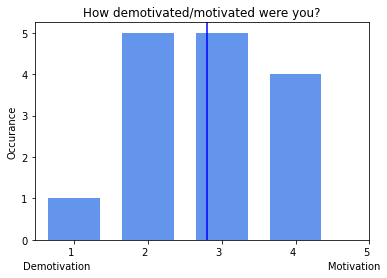

In [146]:
watchermotivation = surveys["w2"]

plt.hist(watchermotivation, bins=np.arange(watchermotivation.min(), watchermotivation.max()+2)-0.5, color='cornflowerblue', rwidth=0.7)

plt.xticks(rotation=0, ha='right')
plt.xticks(np.arange(1,6,1))
plt.yticks(np.arange(0,6,1))
plt.axvline(x = 2.8, color = 'b', linestyle = '-')


plt.xlabel('Demotivation                                                                            Motivation')
plt.ylabel('Occurance')
plt.title("How demotivated/motivated were you?")

Text(0.5, 1.0, 'How much time did you spend observing the observer?')

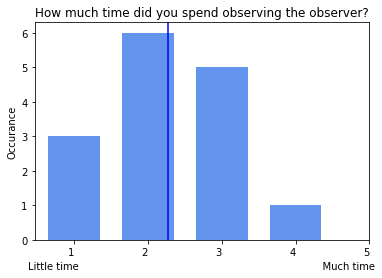

In [150]:
watchertime = surveys["w3"]

plt.hist(watchertime, bins=np.arange(watchertime.min(), watchertime.max()+2)-0.5, color='cornflowerblue', rwidth=0.7)

plt.xticks(rotation=0, ha='right')
plt.xticks(np.arange(1,6,1))
plt.yticks(np.arange(0,7,1))
plt.axvline(x = 2.266, color = 'b', linestyle = '-')


plt.xlabel('Little time                                                                              Much time')
plt.ylabel('Occurance')
plt.title("How much time did you spend observing the observer?")

In [126]:
all_w = surveys[["w1", "w2", "w3"]]

# print(all_w.describe())
print(all_w.mean())

w1    2.266667
w2    2.800000
w3    2.266667
dtype: float64


# Bots

Text(0, 0.5, 'Occurance')

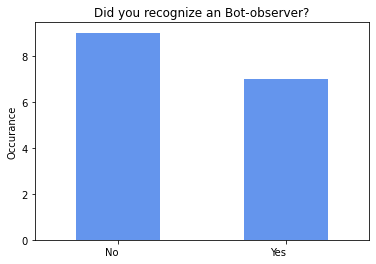

In [152]:
bot = surveys["bot"].value_counts()

bot.plot(kind='bar', color='cornflowerblue')
plt.xticks(rotation=0, ha='right')

plt.title("Did you recognize an Bot-observer?")
plt.ylabel('Occurance')

Text(0.5, 1.0, 'How distracted/focussed were you?')

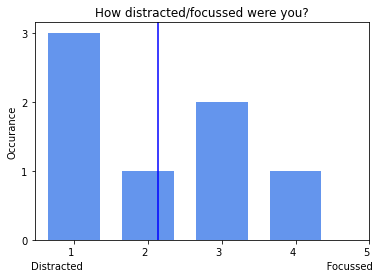

In [141]:
botfocus = surveys["b1"]

plt.hist(botfocus, bins=np.arange(botfocus.min(), botfocus.max()+2)-0.5, color='cornflowerblue', rwidth=0.7)
plt.xticks(rotation=0, ha='right')
plt.xticks(np.arange(1,6,1))
plt.yticks(np.arange(0,4,1))
plt.axvline(x = 2.142, color = 'b', linestyle = '-')

plt.xlabel('Distracted                                                                              Focussed')
plt.ylabel('Occurance')
plt.title("How distracted/focussed were you?")

Text(0.5, 1.0, 'How demotivated/motivated were you?')

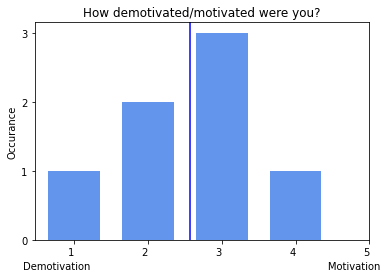

In [139]:
botmotivation = surveys["b2"]

plt.hist(botmotivation, bins=np.arange(botmotivation.min(), botmotivation.max()+2)-0.5, color='cornflowerblue', rwidth=0.7)
plt.xticks(rotation=0, ha='right')
plt.xticks(np.arange(1,6,1))
plt.yticks(np.arange(0,4,1))
plt.axvline(x = 2.571, color = 'b', linestyle = '-')


plt.xlabel('Demotivation                                                                            Motivation')
plt.ylabel('Occurance')
plt.title("How demotivated/motivated were you?")

Text(0.5, 1.0, 'How much time did you spend observing the bot-observer?')

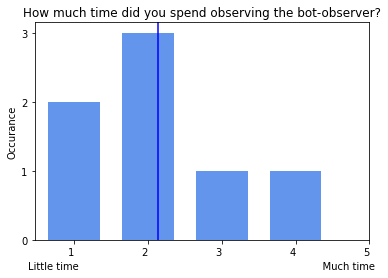

In [153]:
bottime = surveys["b3"]

plt.hist(bottime, bins=np.arange(bottime.min(), bottime.max()+2)-0.5, color='cornflowerblue', rwidth=0.7)
plt.xticks(rotation=0, ha='right')
plt.xticks(np.arange(1,6,1))
plt.yticks(np.arange(0,4,1))
plt.axvline(x = 2.142, color = 'b', linestyle = '-')

plt.xlabel('Little time                                                                              Much time')
plt.ylabel('Occurance')
plt.title("How much time did you spend observing the bot-observer?")

In [127]:
all_b = surveys[["b1", "b2", "b3"]]
# print(all_b.describe())
print(all_b.mean())

b1    2.142857
b2    2.571429
b3    2.142857
dtype: float64
